In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('retail_data.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features:")
print(X_scaled[:5])

First 5 rows of scaled features:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


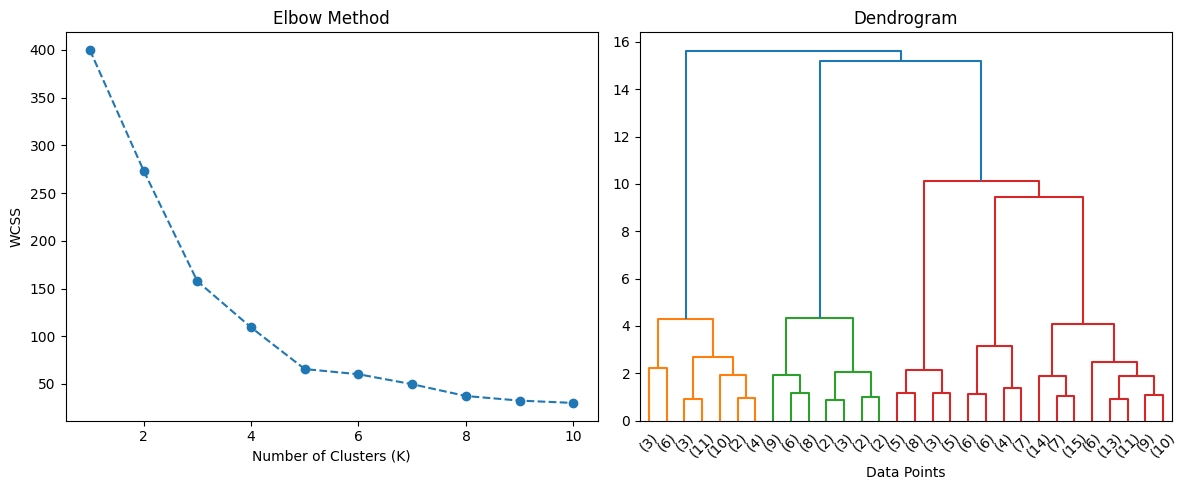

In [3]:
wcss = [KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X_scaled).inertia_ for i in range(1, 11)]

plt.figure(figsize=(12, 5))

#Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, 'o--') 
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

#Dendrogram
plt.subplot(1, 2, 2)
dendrogram(linkage(X_scaled, method='ward'), truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Data Points')

plt.tight_layout()
plt.show()

In [4]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(X_scaled)

agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Labels'] = agglo.fit_predict(X_scaled)

print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, df['KMeans_Labels']):.4f}")
print(f"Agglomerative Silhouette Score: {silhouette_score(X_scaled, df['Agglo_Labels']):.4f}")

K-Means Silhouette Score: 0.5547
Agglomerative Silhouette Score: 0.5538


In [5]:
bandwidth = estimate_bandwidth(X_scaled, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df['MeanShift_Labels'] = ms.fit_predict(X_scaled)

print(f"Mean Shift Silhouette Score: {silhouette_score(X_scaled, df['MeanShift_Labels']):.4f}")
print(f"Number of clusters identified by Mean Shift: {len(np.unique(df['MeanShift_Labels']))}")

Mean Shift Silhouette Score: 0.5290
Number of clusters identified by Mean Shift: 7


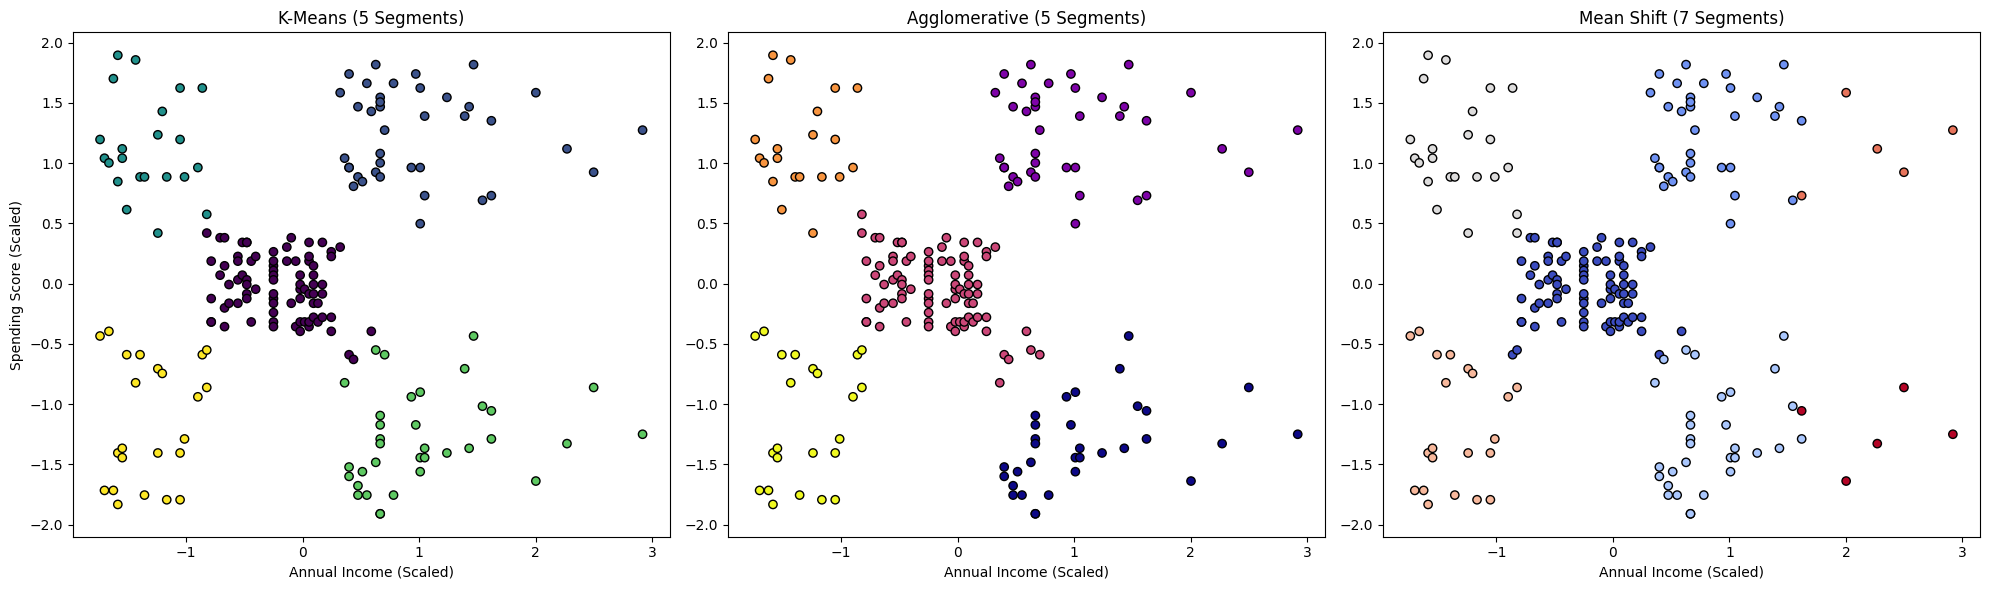

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['KMeans_Labels'], cmap='viridis', edgecolors='k')
axes[0].set_title('K-Means (5 Segments)')
axes[0].set_xlabel('Annual Income (Scaled)')
axes[0].set_ylabel('Spending Score (Scaled)')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Agglo_Labels'], cmap='plasma', edgecolors='k')
axes[1].set_title('Agglomerative (5 Segments)')
axes[1].set_xlabel('Annual Income (Scaled)')

axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['MeanShift_Labels'], cmap='coolwarm', edgecolors='k')
axes[2].set_title('Mean Shift (7 Segments)')
axes[2].set_xlabel('Annual Income (Scaled)')

plt.tight_layout()
plt.show()